<h3>Exploratory Data Analysis (EDA) of HDB Resale Prices from 1990 to 2020

The aim of this project is to analyse the characteristics of Singapore's HDB resale flats and how they relate their resale prices, and from there, to hopefully derive the causes of those observations.<br>

The original datasets (5 CSV files) used contain information of over 800,000 HDB resale flat transactions from 1990 up to 2020, split by year ranges. The data is taken from <a>https://www.kaggle.com/datasets/teyang/singapore-hdb-flat-resale-prices-19902020/data</a>, which was downloaded directly from data.gov.sg.<br>

In each file, some of the fields available are the date of transaction, town, flat type, storey range, floor area (in sqm), and the resale price.

<h4><b>1. Importing and previewing datasets

First, we'll import the required libraries and the 5 CSV files.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

C:\Users\houji\AppData\Local\Temp\ipykernel_8356\3883593961.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
first_df = pd.read_csv("1990_to_1999.csv")
second_df = pd.read_csv("2000_to_2012.csv")
third_df = pd.read_csv("2012_to_2014.csv")
fourth_df = pd.read_csv("2015_to_2016.csv")
fifth_df = pd.read_csv("2017_onwards.csv")

Then, we'll combine all 5 CSV files into a single dataframe, `flats_df`.

In [3]:
flats_df = pd.concat([first_df, second_df, third_df, fourth_df, fifth_df])
flats_df.reset_index(drop=True, inplace=True)

A preview of the `flats_df` dataframe:

In [4]:
flats_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


Instead of coming up with a list of questions to be answered upfront, we will investigate the data first to determine what kinds of questions we could answer with the available information, and later determine what other data we might need for a more complete picture.

In [5]:
print(f"The dataset contains {flats_df.shape[0]} rows and {flats_df.shape[1]} fields.")   

The dataset contains 826581 rows and 11 fields.


In [6]:
flats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                826581 non-null  object 
 1   town                 826581 non-null  object 
 2   flat_type            826581 non-null  object 
 3   block                826581 non-null  object 
 4   street_name          826581 non-null  object 
 5   storey_range         826581 non-null  object 
 6   floor_area_sqm       826581 non-null  float64
 7   flat_model           826581 non-null  object 
 8   lease_commence_date  826581 non-null  int64  
 9   resale_price         826581 non-null  float64
 10  remaining_lease      117527 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 69.4+ MB


From the above information, we see the 11 fields present in the dataset, their data types (floats, integers, and strings), as well as the number of non-nulls in each. Note that all the fields have over 800,000 non-nulls except for the `remaining_lease` field. Let's see why.

In [7]:
flats_df[flats_df.remaining_lease.isnull()]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
709049,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
709050,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
709051,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
709052,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


It seems that the only data with a non-null `remaining_lease` are those that occur after 2014. To make use of data that covers the entire span, we shall <b>only analyse the remaining lease for data after 2014</b>; and <b>for those before 2014, the</b> `remaining_lease` <b>field will be excluded from analysis</b>.

<h4><b>2. Data cleaning

For the rest of the fields, the data seems to be extremely complete (in fact, 100% complete). However, that does not exclude the possibility of the following types of "dirty data" occuring within the dataset, for example:
- Improperly formatted data
- Nonsensical data
- Duplicates

Hence, we will primarily check for these three types of errors to ensure that the data is properly cleaned, before undergoing analysis.

<h4>2.1 Month

In [8]:
# Match the dates with the format yyyy-mm
flats_df.month[flats_df.month.str.fullmatch(r'\d{4}-\d{2}') == False].nunique()

0

All the dates are properly formatted.

<h4>2.2 Towns

In [9]:
flats_df["town"] = flats_df["town"].map(lambda x: x.title())

In [10]:
pprint(sorted(list(flats_df.town.unique())))
print(f"Number of towns: {flats_df.town.nunique()}")

['Ang Mo Kio',
 'Bedok',
 'Bishan',
 'Bukit Batok',
 'Bukit Merah',
 'Bukit Panjang',
 'Bukit Timah',
 'Central Area',
 'Choa Chu Kang',
 'Clementi',
 'Geylang',
 'Hougang',
 'Jurong East',
 'Jurong West',
 'Kallang/Whampoa',
 'Lim Chu Kang',
 'Marine Parade',
 'Pasir Ris',
 'Punggol',
 'Queenstown',
 'Sembawang',
 'Sengkang',
 'Serangoon',
 'Tampines',
 'Toa Payoh',
 'Woodlands',
 'Yishun']
Number of towns: 27


The 27 names listed under the `town` column tallies with the 24 towns + 3 estates (Bukit Timah, Central, Marine Parade) provided by HDB, so we can move on.

<h4>2.3 Flat Type

In [11]:
pprint((list(flats_df.flat_type.unique())))
print(f"Number of flat types: {flats_df.flat_type.nunique()}")

['1 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 '2 ROOM',
 'EXECUTIVE',
 'MULTI GENERATION',
 'MULTI-GENERATION']
Number of flat types: 8


There are 8 flat types listed, but "Multi-Generation" flats have two separate names, one hyphenated and the other not. Also, for reasons of standardisation, all strings will be converted to title case.

In [12]:
import re

def clean_flat_type(s):
    if re.match(r'(\d) ROOM', s):
        return s[0] + "-Room"
    elif s == "EXECUTIVE":
        return "Executive"
    else:
        return "Multi-Generation"

In [13]:
flats_df["flat_type"] = flats_df["flat_type"].map(clean_flat_type)

<h4>2.4 Storey Range

In [14]:
pprint((list(flats_df.storey_range.unique())))
print(f"Number of flat types: {flats_df.storey_range.nunique()}")

['10 TO 12',
 '04 TO 06',
 '07 TO 09',
 '01 TO 03',
 '13 TO 15',
 '19 TO 21',
 '16 TO 18',
 '25 TO 27',
 '22 TO 24',
 '28 TO 30',
 '31 TO 33',
 '40 TO 42',
 '37 TO 39',
 '34 TO 36',
 '06 TO 10',
 '01 TO 05',
 '11 TO 15',
 '16 TO 20',
 '21 TO 25',
 '26 TO 30',
 '36 TO 40',
 '31 TO 35',
 '46 TO 48',
 '43 TO 45',
 '49 TO 51']
Number of flat types: 25


Most of the storey ranges are of an <i>interval of three</i> (e.g. storey 13 to storey 15), yet some are given in <i>intervals of five</i> (e.g. storey 21 to storey 25). Let's see if we can understand this difference in the grouping.

In [15]:
grouped_in_three = flats_df[flats_df.storey_range == "01 TO 03"]
grouped_in_five = flats_df[flats_df.storey_range == "01 TO 05"]

In [16]:
grouped_in_three.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
5,1990-01,Ang Mo Kio,3-Room,211,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,46000.0,NaN
9,1990-01,Ang Mo Kio,3-Room,232,ANG MO KIO AVE 3,01 TO 03,67.0,NEW GENERATION,1977,47000.0,NaN
30,1990-01,Ang Mo Kio,3-Room,130,ANG MO KIO AVE 3,01 TO 03,88.0,NEW GENERATION,1979,50000.0,NaN
48,1990-01,Ang Mo Kio,3-Room,450,ANG MO KIO AVE 10,01 TO 03,83.0,NEW GENERATION,1979,48000.0,NaN
49,1990-01,Ang Mo Kio,3-Room,435,ANG MO KIO AVE 10,01 TO 03,67.0,NEW GENERATION,1979,47200.0,NaN


In [17]:
grouped_in_five.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
656852,2012-03,Ang Mo Kio,2-Room,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN
656854,2012-03,Ang Mo Kio,3-Room,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN
656856,2012-03,Ang Mo Kio,3-Room,154,ANG MO KIO AVE 5,01 TO 05,68.0,New Generation,1981,321000.0,NaN
656857,2012-03,Ang Mo Kio,3-Room,110,ANG MO KIO AVE 4,01 TO 05,67.0,New Generation,1978,323000.0,NaN
656858,2012-03,Ang Mo Kio,3-Room,445,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1979,325000.0,NaN


Interestingly, flats that are resold from 2012 onwards seem to be grouped in intervals of five while those that are resold before 2012 are grouped in intervals of three.<br>
For the sake of consistency, flats will be grouped in intervals of 15, i.e. 1st floor to 15th floor, 16th floor to 30th floor, 31st floor to 45th floor and 46th floor and beyond.

In [18]:
def clean_storey(s):
    first_group = {"01 TO 03", "04 TO 06", "07 TO 09", "10 TO 12", "13 TO 15", "01 TO 05", "06 TO 10", "11 TO 15"}
    second_group = {"16 TO 18", "19 TO 21", "22 TO 24", "25 TO 27", "28 TO 30", "16 TO 20", "21 TO 25", "26 TO 30"}
    third_group = {"31 TO 33", "34 TO 36", "37 TO 39", "40 TO 42", "43 TO 45", "31 TO 35", "36 TO 40", "41 TO 45"}

    if s in first_group:
        return "1 to 15"
    elif s in second_group:
        return "16 to 30"
    elif s in third_group:
        return "31 to 45"
    else:
        return "46 and above"

In [19]:
flats_df["storey_range"] = flats_df["storey_range"].map(clean_storey)

<h4>2.5 Floor Area, Lease Commence Date, Resale Price

In [20]:
flats_df.floor_area_sqm.dtype, flats_df.lease_commence_date.dtype, flats_df.resale_price.dtype

(dtype('float64'), dtype('int64'), dtype('float64'))

In [21]:
flats_df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,826581.000000,826581.000000,8.265810e+05
mean,95.557909,1987.149345,2.935490e+05
std,26.057093,9.451743,1.487536e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1980.000000,1.810000e+05
50%,93.000000,1986.000000,2.750000e+05
75%,114.000000,1994.000000,3.830000e+05
max,307.000000,2019.000000,1.258000e+06


All the values seem plausible and are of the correct data type.

<h4>2.6 Flat model

In [22]:
pprint(sorted(list(flats_df.flat_model.unique())))
print(f"Number of flat types: {flats_df.flat_model.nunique()}")

['2-ROOM',
 '2-room',
 'APARTMENT',
 'Adjoined flat',
 'Apartment',
 'DBSS',
 'IMPROVED',
 'IMPROVED-MAISONETTE',
 'Improved',
 'Improved-Maisonette',
 'MAISONETTE',
 'MODEL A',
 'MODEL A-MAISONETTE',
 'MULTI GENERATION',
 'Maisonette',
 'Model A',
 'Model A-Maisonette',
 'Model A2',
 'Multi Generation',
 'NEW GENERATION',
 'New Generation',
 'PREMIUM APARTMENT',
 'Premium Apartment',
 'Premium Apartment Loft',
 'Premium Maisonette',
 'SIMPLIFIED',
 'STANDARD',
 'Simplified',
 'Standard',
 'TERRACE',
 'Terrace',
 'Type S1',
 'Type S2']
Number of flat types: 33


Among the 33 types of flat models, several of them are duplicates. Actually, there are only 20 unique flat models here:

In [23]:
flats_df["flat_model"] = flats_df["flat_model"].map(lambda x: x.title())
pprint(sorted(list(flats_df.flat_model.unique())))
print(f"Number of flat types: {flats_df.flat_model.nunique()}")

['2-Room',
 'Adjoined Flat',
 'Apartment',
 'Dbss',
 'Improved',
 'Improved-Maisonette',
 'Maisonette',
 'Model A',
 'Model A-Maisonette',
 'Model A2',
 'Multi Generation',
 'New Generation',
 'Premium Apartment',
 'Premium Apartment Loft',
 'Premium Maisonette',
 'Simplified',
 'Standard',
 'Terrace',
 'Type S1',
 'Type S2']
Number of flat types: 20


In [24]:
def clean_flat_model(s):
    if s == "Dbss": return "DBSS"
    elif s == "Improved-Maisonette": return "Improved Maisonette"
    elif s == "Model A-Maisonette": return "Model A Maisonette"
    elif s == "Multi Generation": return "Multi-Generation"
    else: return s

flats_df["flat_model"] = flats_df["flat_model"].map(clean_flat_model)
pprint(sorted(list(flats_df.flat_model.unique())))

['2-Room',
 'Adjoined Flat',
 'Apartment',
 'DBSS',
 'Improved',
 'Improved Maisonette',
 'Maisonette',
 'Model A',
 'Model A Maisonette',
 'Model A2',
 'Multi-Generation',
 'New Generation',
 'Premium Apartment',
 'Premium Apartment Loft',
 'Premium Maisonette',
 'Simplified',
 'Standard',
 'Terrace',
 'Type S1',
 'Type S2']


Now, we have successfully cleaned up all the data. The last step would be transform some of our data into more usable forms, namely:
- Splitting the `month` field into their respective years and months
- Converting the resale prices into thousands of dollars
- Adjusting the resale prices for inflation. As a proxy of general price levels in each year, the annual Consumer Price Index (CPI) will be used, with the baseline CPI of 2019 set at 100. [2] 

In [25]:
flats_df.insert(1, "transaction_year", flats_df["month"].map(lambda x: int(x[:4])))

In [26]:
flats_df.insert(2, "transaction_month", flats_df["month"].map(lambda x: int(x[-2:])))

In [27]:
flats_df.drop(["month"], axis=1, inplace=True)

In [28]:
flats_df["resale_price"] = flats_df["resale_price"].map(lambda x: x/1000)

In [29]:
annual_cpi = {1990: 62.743, 1991: 64.901, 1992: 66.357,
              1993: 67.878, 1994: 69.978, 1995: 71.185,
              1996: 72.167, 1997: 73.627, 1998: 73.428,
              1999: 73.445, 2000: 74.435, 2001: 75.190,
              2002: 74.896, 2003: 75.261, 2004: 76.518,
              2005: 76.877, 2006: 77.617, 2007: 79.251,
              2008: 84.504, 2009: 85.008, 2010: 87.408,
              2011: 91.995, 2012: 96.205, 2013: 98.474,
              2014: 99.483, 2015: 98.963, 2016: 98.436,
              2017: 99.004, 2018: 99.438, 2019: 100.00,
              2020: 99.818, 2021: 102.119, 2022: 108.370,
              2023: 113.595}

In [30]:
def adjust_resale_price(row):
    year, price = row["transaction_year"], row["resale_price"]
    cpi = annual_cpi[year]
    return price * (100.00 / cpi)

In [31]:
flats_df["real_resale_price"] = flats_df.apply(adjust_resale_price, axis=1)

In [32]:
flats_df

,transaction_year,transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,real_resale_price
0,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,9.0,NaN,14.344230
1,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,6.0,NaN,9.562820
2,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,8.0,NaN,12.750426
3,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,6.0,NaN,9.562820
4,1990,1,Ang Mo Kio,3-Room,216,ANG MO KIO AVE 1,1 to 15,73.0,New Generation,1976,47.2,NaN,75.227515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,2020,9,Yishun,5-Room,716,YISHUN ST 71,1 to 15,131.0,Improved,1987,440.0,66 years 03 months,440.802260
826577,2020,9,Yishun,5-Room,760,YISHUN ST 72,1 to 15,122.0,Improved,1987,458.0,65 years 06 months,458.835080
826578,2020,9,Yishun,5-Room,835,YISHUN ST 81,1 to 15,122.0,Improved,1987,490.0,66 years 04 months,490.893426
826579,2020,9,Yishun,Executive,791,YISHUN AVE 2,1 to 15,146.0,Maisonette,1987,558.0,66 years 03 months,559.017412


<h4><b>3. Exploratory Data Analysis

Looking at the information we have, some possible questions we could ask about the data are:
1) How have resale prices fluctuated over the years? What causes these fluctuations?
2) How do resale prices differ across towns? Are resale prices in mature estates higher than those in non-mature estates, and by how much?
3) How do resale prices differ across flat types and floor areas?
4) Do flats at higher storeys fetch higher resale prices?
5) How strongly does the remaining lease correlate with resale prices?

<h4>3.1 How have resale prices fluctuated over the years? What causes these fluctuations?

In [33]:
yearly_resale_prices = flats_df.groupby(["transaction_year"], as_index=False)["real_resale_price"].mean()

Text(0, 0.5, 'Resale Price (thousands)')

<Figure size 800x600 with 0 Axes>

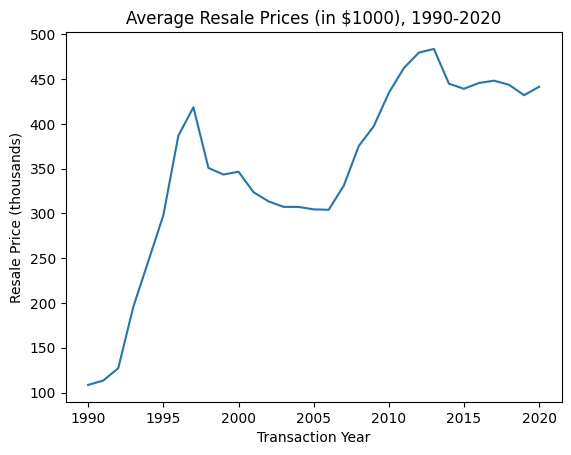

In [34]:
plt.figure(figsize=(8,6))
yearly_resale_prices.plot.line(x="transaction_year", legend=False)
plt.title("Average Resale Prices (in $1000), 1990-2020")
plt.xlabel("Transaction Year")
plt.ylabel("Resale Price (thousands)")

From the graph, we can make <b>two</b> key observations:
- Resale prices have <b>soared by roughly 300%</b> since 1990, after taking inflation into account.
- Housing prices <b>fell noticeably in 1997 and 2013</b>.

Let's investigate the breakdown by flat type.

In [35]:
yearly_resale_prices_by_type = flats_df.groupby(["transaction_year", "flat_type"], as_index=False)["real_resale_price"].mean()

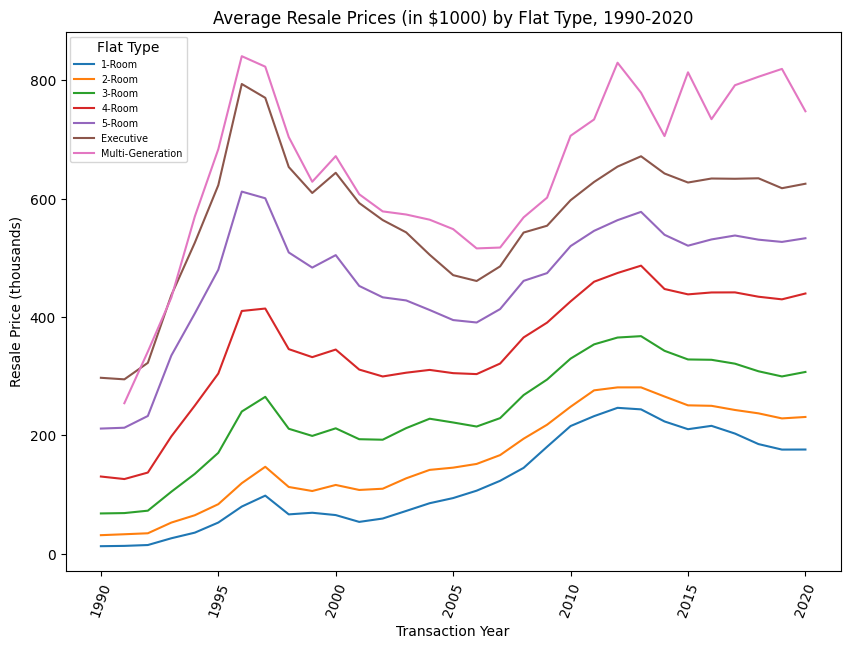

In [36]:
plt.figure(figsize=(10,7))
sns.lineplot(data=yearly_resale_prices_by_type, x="transaction_year", y="real_resale_price", hue="flat_type")
plt.title("Average Resale Prices (in $1000) by Flat Type, 1990-2020")
plt.xlabel("Transaction Year")
plt.ylabel("Resale Price (thousands)")
plt.xticks(rotation=70)
plt.legend(title="Flat Type", fontsize="x-small", loc="upper left")

Indeed, the trend follows consistently throughout the 7 flat types.

Let's attempt to explain  the dips in prices in 1997 and 2013.<br>

In 1997, Singapore was struck by the <b>1997 Asian Financial Crisis (AFC)</b> after the collapse of the Thai baht. Before that, resale prices increased steadily. However, once economic recession set in, mortgage rates spiked which caused a dip in the demand of HDB flats. Prices remained stunted for almost 10 years until the market began recovering in 2006, and prices rose steadily again.<br>

In 2013, an <b>Additional Buyer's Stamp Duty (ABSD)</b> was introduced as a cooling measure for people who wanted to buy a second home. Thereafter, resale prices fell for 9 consecutive quarters. [1]

<h4>3.2 How do resale prices differ across towns? Are resale prices in mature estates higher than those in non-mature estates, and by how much?

Let's take a look at the mean resale prices in each town.

In [37]:
price_by_town = flats_df.groupby(["town"], as_index=False)["real_resale_price"].mean()
price_by_town.sort_values(by=["real_resale_price"], ascending=False, ignore_index=True, inplace=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, 'Bukit Timah'),
  Text(1, 0, 'Bishan'),
  Text(2, 0, 'Pasir Ris'),
  Text(3, 0, 'Punggol'),
  Text(4, 0, 'Sengkang'),
  Text(5, 0, 'Marine Parade'),
  Text(6, 0, 'Sembawang'),
  Text(7, 0, 'Choa Chu Kang'),
  Text(8, 0, 'Tampines'),
  Text(9, 0, 'Serangoon'),
  Text(10, 0, 'Bukit Merah'),
  Text(11, 0, 'Bukit Panjang'),
  Text(12, 0, 'Hougang'),
  Text(13, 0, 'Central Area'),
  Text(14, 0, 'Woodlands'),
  Text(15, 0, 'Kallang/Whampoa'),
  Text(16, 0, 'Toa Payoh'),
  Text(17, 0, 'Jurong West'),
  Text(18, 0, 'Jurong East'),
  Text(19, 0, 'Clementi'),
  Text(20, 0, 'Bedok'),
  Text(21, 0, 'Bukit Batok'),
  Text(22, 0, 'Queenstown'),
  Text(23, 0, 'Yishun'),
  Text(24, 0, 'Geylang'),
  Text(25, 0, 'Ang Mo Kio'),
  Text(26, 0, 'Lim Chu Kang')])

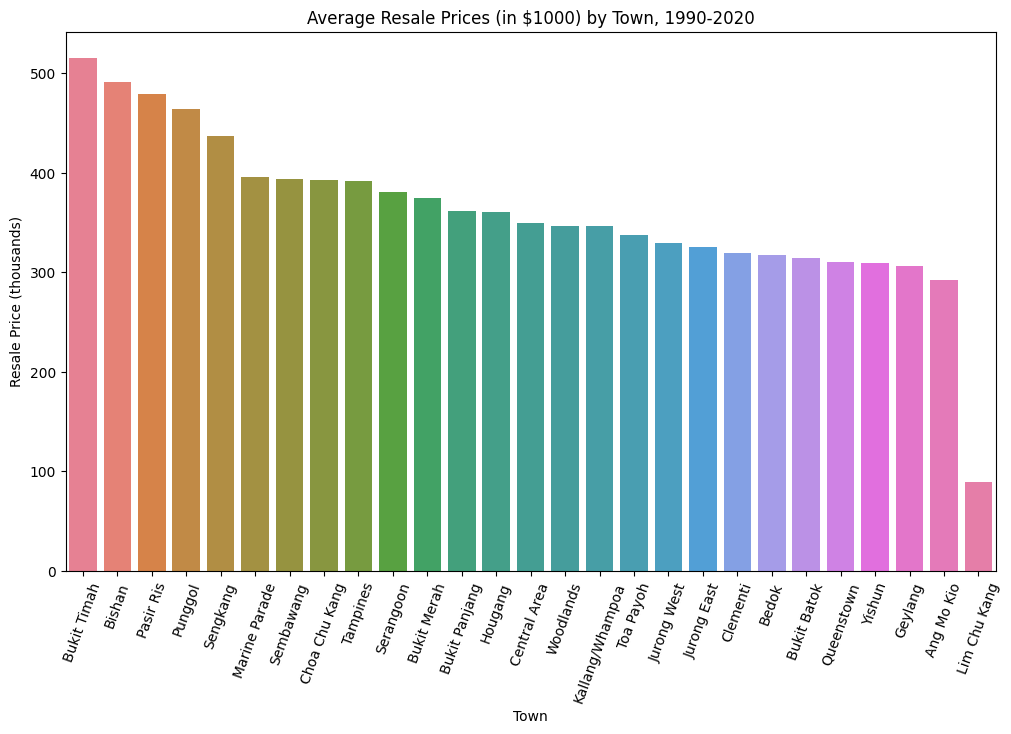

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(price_by_town, x="town", y="real_resale_price", hue="town")
plt.title("Average Resale Prices (in $1000) by Town, 1990-2020")
plt.xlabel("Town")
plt.ylabel("Resale Price (thousands)")
plt.xticks(rotation=70)

From this bar chart alone, we see a handful of towns which stand out from the rest:
- On the higher end, <b>flats in the top 5 towns (Bukit Timah, Bishan, Pasir Ris, Punggol, Sengkang) fetch noticeably higher prices than the rest</b>, with flats in Bukit Timah reaching an average resale price of over $500,000.
- On the lower end, <b>flats in Lim Chu Kang fetch prices a third of those in the town in second last place, Ang Mo Kio</b>, at less than $100,000.

(Out of curiosity, let's display some of the entries in Lim Chu Kang.)

In [39]:
flats_df[flats_df.town == "Lim Chu Kang"]

,transaction_year,transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,real_resale_price
3217,1990,3,Lim Chu Kang,3-Room,3,LIM CHU KANG RD,1 to 15,59.0,Improved,1980,20.4,NaN,32.513587
5988,1990,6,Lim Chu Kang,4-Room,3,LIM CHU KANG RD,1 to 15,83.0,Improved,1980,32.5,NaN,51.798607
10136,1990,10,Lim Chu Kang,4-Room,4,LIM CHU KANG RD,1 to 15,83.0,Improved,1980,45.7,NaN,72.836810
14335,1991,2,Lim Chu Kang,3-Room,3,LIM CHU KANG RD,1 to 15,70.0,Improved,1980,33.2,NaN,51.154836
15153,1991,3,Lim Chu Kang,4-Room,4,LIM CHU KANG RD,1 to 15,83.0,Improved,1980,45.5,NaN,70.106778
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211688,1998,9,Lim Chu Kang,3-Room,4,LIM CHU KANG RD,1 to 15,59.0,Improved,1980,66.0,NaN,89.883968
216988,1998,10,Lim Chu Kang,3-Room,3,LIM CHU KANG RD,1 to 15,70.0,Improved,1980,88.0,NaN,119.845291
222341,1998,11,Lim Chu Kang,3-Room,3,LIM CHU KANG RD,1 to 15,59.0,Improved,1980,65.0,NaN,88.522090
222342,1998,11,Lim Chu Kang,4-Room,4,LIM CHU KANG RD,1 to 15,83.0,Improved,1980,100.0,NaN,136.187830


All the Lim Chu Kang flats seem to be Improved flats from the 1990s, built along Lim Chu Kang Rd. However, since the late 1990s, the government has cleared the town to create more space for Sungei Gedong Camp, which would explain the sale of these HDBs.

In 1992, HDB began classifying the 27 towns/estates into mature and non-mature, based on their opportunity for development. Of these 27 towns/estates, 15 were classified as mature (listed under `mature_estates`), and the other 12 as non-mature. Flats in mature estates are typically more expensive than those in non-mature estates due to their better location, connectivity and having more amenities. [3]

Now, we will compare the resale prices of flats in mature and non-mature estates to see if there is any relationship.

In [40]:
mature_estates = {"Ang Mo Kio", "Bedok", "Bishan", "Bukit Merah", "Bukit Timah", "Central Area", "Clementi", "Geylang", "Kallang/Whampoa", "Marine Parade", "Pasir Ris", "Queenstown", "Serangoon", "Tampines", "Toa Payoh"}

def split_by_maturity(row):
    return "Mature" if row["town"] in mature_estates else "Non-Mature"

In [41]:
flats_df["maturity"] = flats_df.apply(split_by_maturity, axis=1)
flats_df.head()

,transaction_year,transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,real_resale_price,maturity
0,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,9.0,NaN,14.344230,Mature
1,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,6.0,NaN,9.562820,Mature
2,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,8.0,NaN,12.750426,Mature
3,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,6.0,NaN,9.562820,Mature
4,1990,1,Ang Mo Kio,3-Room,216,ANG MO KIO AVE 1,1 to 15,73.0,New Generation,1976,47.2,NaN,75.227515,Mature


In [42]:
# Taking a 50% sample to reduce computational cost 

sample_flats_df = flats_df.sample(frac=0.5, replace=True, random_state=1)

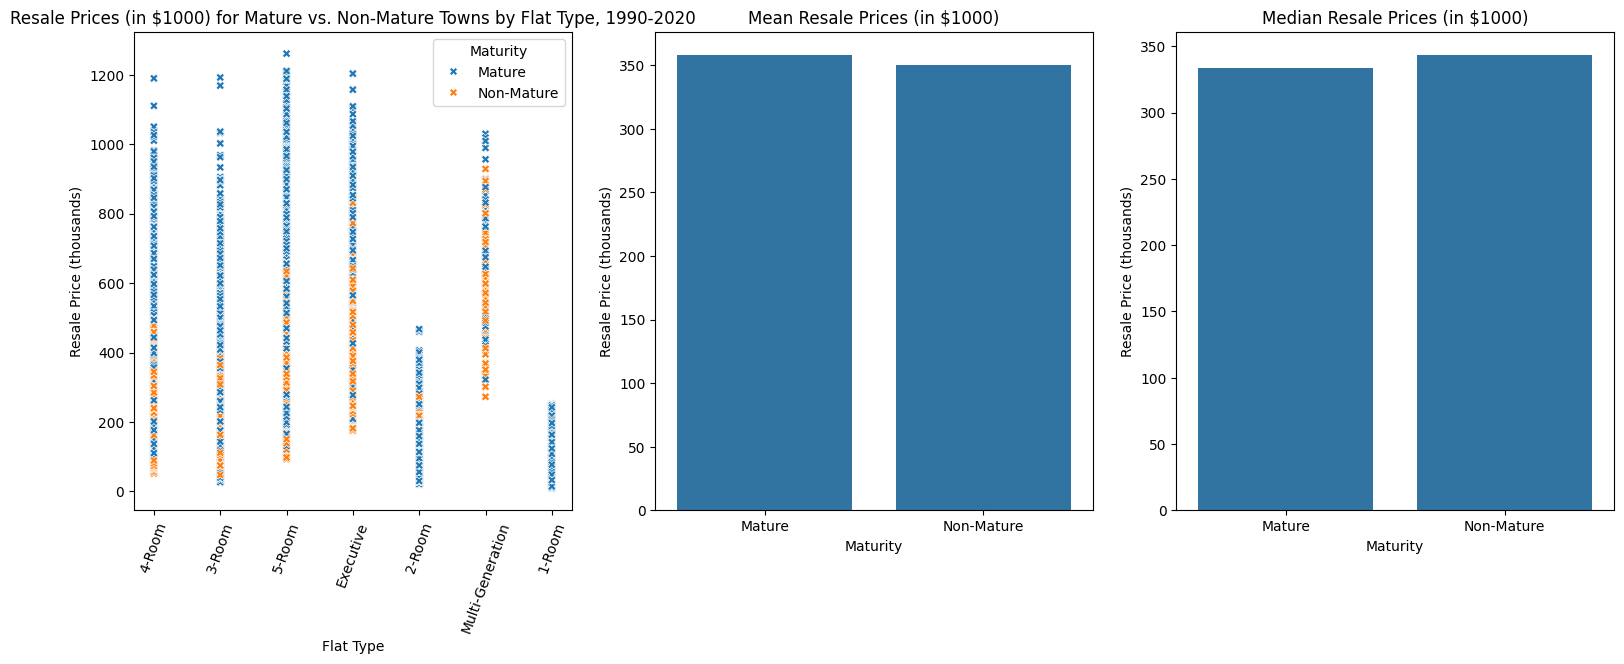

In [43]:
temp_series = sample_flats_df.groupby(["maturity"], as_index=False)["real_resale_price"]

plt.figure(figsize=(16, 7))
plt.subplot(1, 3, 1)
sns.scatterplot(sample_flats_df, x="flat_type", y="real_resale_price", hue="maturity", marker="X")
plt.title("Resale Prices (in $1000) for Mature vs. Non-Mature Towns by Flat Type, 1990-2020")
plt.xlabel("Flat Type")
plt.ylabel("Resale Price (thousands)")
plt.legend(title="Maturity")
plt.xticks(rotation=70)

plt.subplot(1, 3, 2)
sns.barplot(temp_series.mean(), x="maturity", y="real_resale_price")
plt.title("Mean Resale Prices (in $1000)")
plt.xlabel("Maturity")
plt.ylabel("Resale Price (thousands)")

plt.subplot(1, 3, 3)
sns.barplot(temp_series.median(), x="maturity", y="real_resale_price")
plt.title("Median Resale Prices (in $1000)")
plt.xlabel("Maturity")
plt.ylabel("Resale Price (thousands)")

plt.tight_layout(pad=2)

In [44]:
mean_df, median_df = temp_series.mean(), temp_series.median()
mean_diff = (mean_df.iloc[0]["real_resale_price"] - mean_df.iloc[1]["real_resale_price"]) * 1000
median_diff = (median_df.iloc[0]["real_resale_price"] - median_df.iloc[1]["real_resale_price"]) * 1000
print(f"Difference in mean: {mean_diff:.0f}")
print(f"Difference in median: {median_diff:.0f}")

Difference in mean: 8236
Difference in median: -10064


At first glance, from the scatterplot on the left, it seems that <b>in almost all flat types, except for Multi-Generation flats, flats in mature towns occupy the higher end of resale prices, while those in non-mature estates occupy those on the lower</b>.<br>

However, it is surprising to note that <i>the difference in the mean and median resale price is quite minute</i>. In fact, the results of the latter two graphs appear to contradict each other as the mean price of those in mature estates is higher than that of non-mature ones, but the median shows the opposite difference. Due to the large number of data points being plotted (> 400,000), the scatterplot might not be accurately displaying the location of every single data point. To examine this in a different perspective, we will plot the density distribution by flat type.

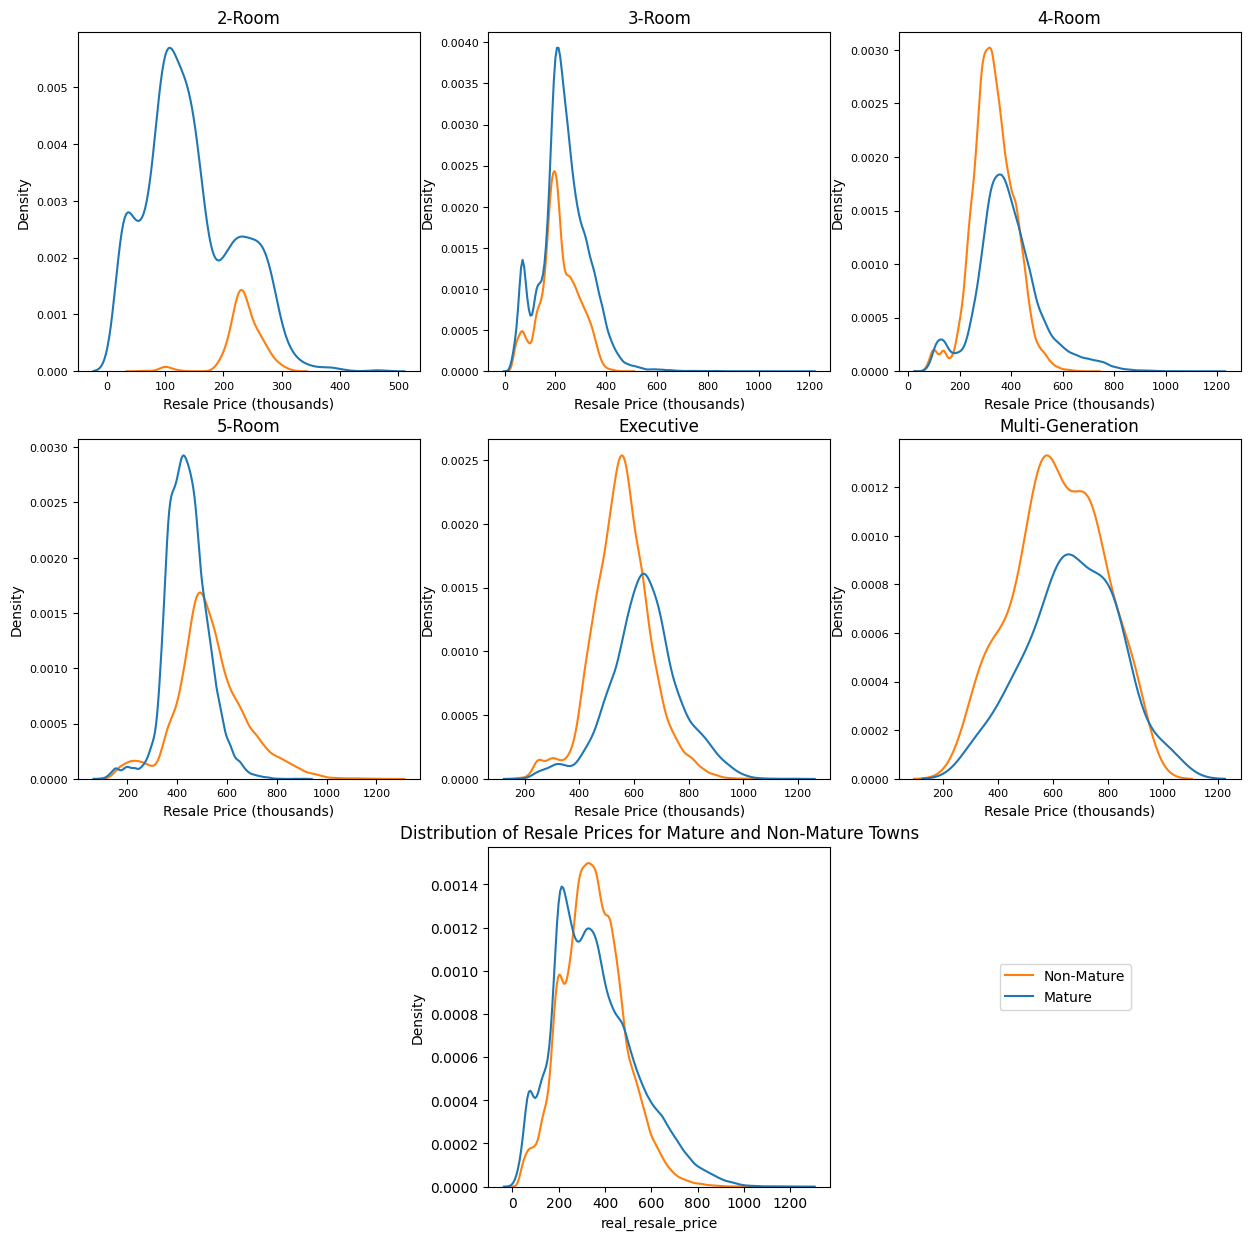

In [45]:
flat_types = sorted(list(sample_flats_df.flat_type.unique()))

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(1, len(flat_types)):
    plt.subplot(3, 3, i)
    g = sns.kdeplot(data=sample_flats_df[sample_flats_df.flat_type == flat_types[i]], x="real_resale_price", hue="maturity")
    g.legend_.remove()
    plt.xlabel("Resale Price (thousands)")
    plt.title(flat_types[i])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.subplot(3, 3, 8)
g = sns.kdeplot(data=sample_flats_df, x="real_resale_price", hue="maturity")
plt.title("Distribution of Resale Prices for Mature and Non-Mature Towns")

plt.legend(["Non-Mature", "Mature"], loc="lower right", bbox_to_anchor=(1.9, 0.5))
fig.delaxes(ax[2, 0])
fig.delaxes(ax[2, 2])

Indeed, plotting the density distributions of the resale prices illustrates <b>no clear relationship between the maturity of the town and the resale prices of the flats in those regions</b>.

<h4>3.3 How do resale prices differ across flat types, flat models and floor areas?

Let's look at the distribution of flat types and models.

In [46]:
type_df = flats_df.groupby("flat_type").size()
model_df = flats_df.groupby("flat_model").size()

Text(0.5, 1.0, 'Distribution of Flat Models')

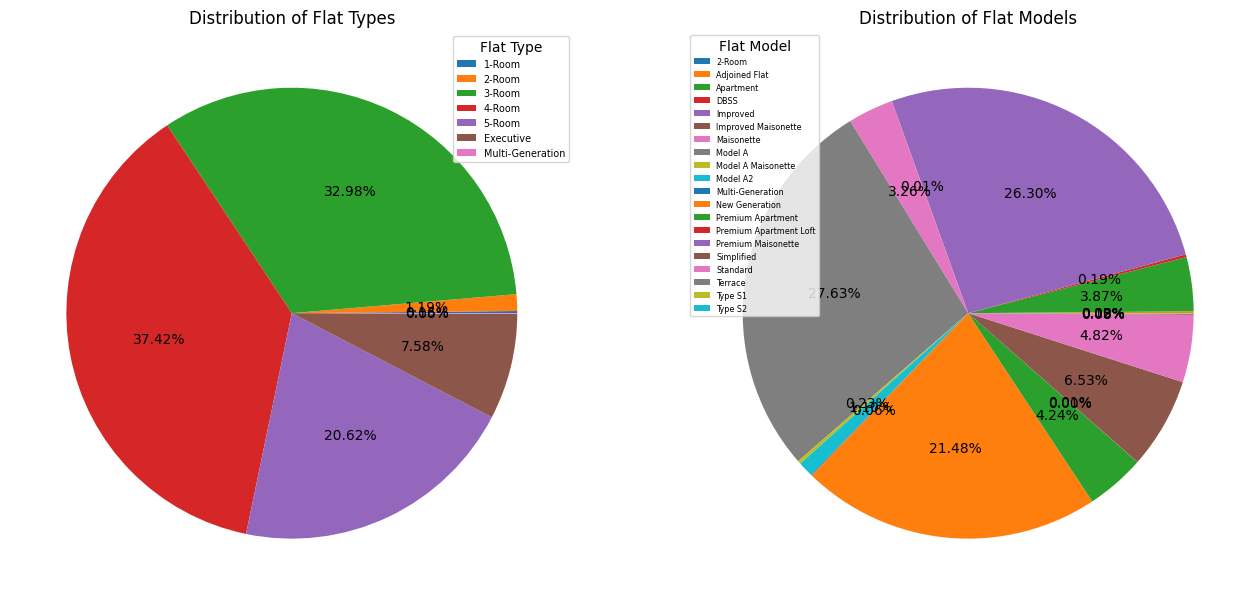

In [47]:
plt.subplots(1, 2, figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.pie(type_df, autopct="%1.2f%%")
plt.legend(type_df.index, title="Flat Type", fontsize="x-small", loc="upper right")
plt.title("Distribution of Flat Types")

plt.subplot(1, 2, 2)
plt.pie(model_df, autopct="%1.2f%%")
plt.legend(model_df.index, title="Flat Model", fontsize="xx-small", loc="best")
plt.title("Distribution of Flat Models")

In [48]:
model_df.sort_values()

flat_model
Premium Apartment Loft        31
2-Room                        40
Premium Maisonette            82
Improved Maisonette          114
Type S2                      129
Type S1                      272
Multi-Generation             502
Terrace                      642
Adjoined Flat               1085
DBSS                        1609
Model A Maisonette          1889
Model A2                    9109
Maisonette                 26909
Apartment                  32004
Premium Apartment          35035
Standard                   39854
Simplified                 53960
New Generation            177570
Improved                  217356
Model A                   228389
dtype: int64

We note that the <b>most popular flat types are 3- to 5-Room flats (4-Room flats being the most popular)</b>, while the others are in significantly smaller proportions. Also, the most popular flat models are Model A, Improved and New Generation. However, <i>analysis on flat model will not be performed</i> as the models available:
1) Are different across decades, with some models being phased out as new models were introduced
2) Feature minute variations between some models, e.g. additional/separated WC, additional ~5 sqm of floor area [4]<br>

Therefore, analysing by flat model is unlikely to yield meaningful observations, and will be excluded in this project.

In [49]:
price_by_type = flats_df.groupby(["flat_type"], as_index=False)[["real_resale_price", "floor_area_sqm"]].mean()
price_by_type

,flat_type,real_resale_price,floor_area_sqm
0,1-Room,78.318321,30.262372
1,2-Room,150.898163,45.342208
2,3-Room,227.431932,68.410008
3,4-Room,357.329812,96.722370
4,5-Room,479.472456,121.192779
5,Executive,592.223766,146.906298
6,Multi-Generation,643.796126,161.868526


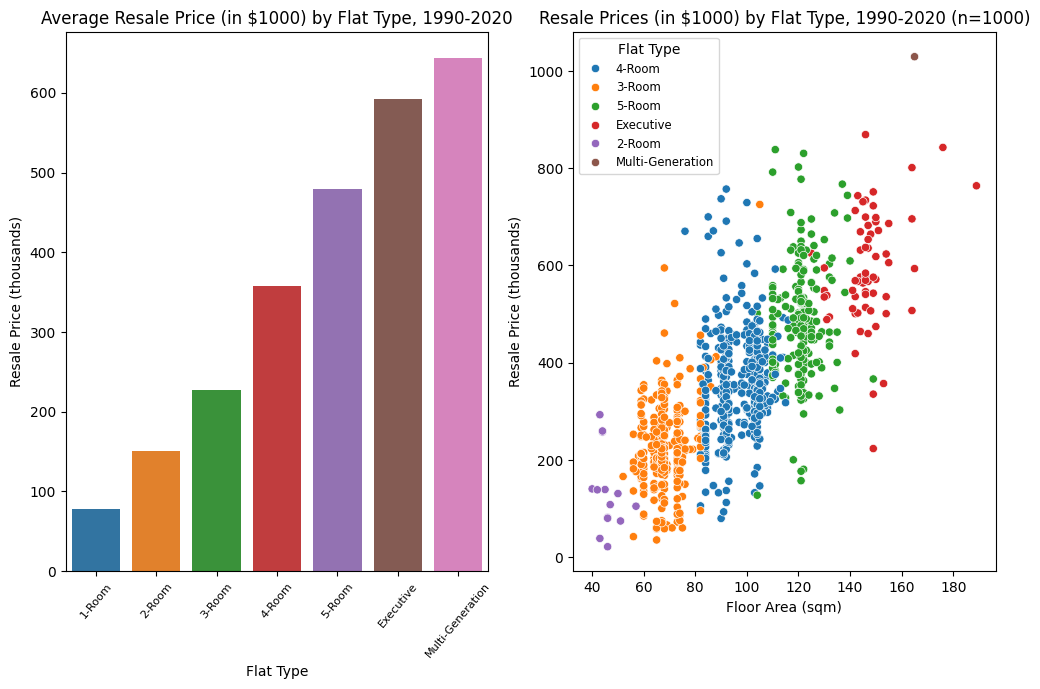

In [50]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.barplot(price_by_type, x="flat_type", y="real_resale_price", hue="flat_type")
plt.title("Average Resale Price (in $1000) by Flat Type, 1990-2020")
plt.xlabel("Flat Type")
plt.ylabel("Resale Price (thousands)")
plt.xticks(rotation=50, fontsize=8)

plt.subplot(1, 2, 2)
sns.scatterplot(flats_df.sample(n=1000, replace=True, random_state=1), x="floor_area_sqm", y="real_resale_price", hue="flat_type")
plt.title("Resale Prices (in $1000) by Flat Type, 1990-2020 (n=1000)")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price (thousands)")
plt.legend(title="Flat Type", fontsize="small")

As expected, <b>the resale price grows in tandem with flat type, and of course, floor area</b>, since the flat type is <i>defined</i> by the floor area instead of the number of rooms in the flats.

<h4>3.4 Do flats at higher storeys fetch higher resale prices?

In [51]:
price_by_storey = flats_df.groupby(["storey_range"], as_index=False)["real_resale_price"].mean()
price_by_storey

,storey_range,real_resale_price
0,1 to 15,347.381687
1,16 to 30,492.019776
2,31 to 45,822.094275
3,46 and above,1000.761236


Unsurprisingly, <b>the price of the flats increase with the storey range of the flat</b>, with the greatest jump in prices between 16 to 30 and 31 to 45. Since flats at higher storeys generally have better ventilation, better views and are further away from the hubbub of ground-level commotion, they experience stronger demand.

<h4>3.5 How strongly does the remaining lease correlate with resale prices?

Before analysing the relationship between the remaining lease and resale price, let's look at `flats_df` again.

In [52]:
flats_df.describe()

,transaction_year,transaction_month,floor_area_sqm,lease_commence_date,resale_price,real_resale_price
count,826581.000000,826581.000000,826581.000000,826581.000000,826581.000000,826581.000000
mean,2004.234957,6.565243,95.557909,1987.149345,293.548994,354.756683
std,7.926336,3.391830,26.057093,9.451743,148.753597,157.372225
min,1990.000000,1.000000,28.000000,1966.000000,5.000000,7.969016
25%,1998.000000,4.000000,73.000000,1980.000000,181.000000,240.926601
50%,2003.000000,7.000000,93.000000,1986.000000,275.000000,339.789331
75%,2010.000000,9.000000,114.000000,1994.000000,383.000000,448.197899
max,2020.000000,12.000000,307.000000,2019.000000,1258.000000,1260.293735


In [53]:
flats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   transaction_year     826581 non-null  int64  
 1   transaction_month    826581 non-null  int64  
 2   town                 826581 non-null  object 
 3   flat_type            826581 non-null  object 
 4   block                826581 non-null  object 
 5   street_name          826581 non-null  object 
 6   storey_range         826581 non-null  object 
 7   floor_area_sqm       826581 non-null  float64
 8   flat_model           826581 non-null  object 
 9   lease_commence_date  826581 non-null  int64  
 10  resale_price         826581 non-null  float64
 11  remaining_lease      117527 non-null  object 
 12  real_resale_price    826581 non-null  float64
 13  maturity             826581 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 88.3+ MB


As of now, our `remaining_lease` field contains over 700,000 NaNs. Given that HDB flats generally have a 99-year lease, we can simply compute the remaining lease as 99 - (Transaction Year - Year of Lease Commencement).

In [54]:
def get_rem_lease(row):
    year, start_year = row["transaction_year"], row["lease_commence_date"]
    return 99 - (year - start_year)

def rem_lease_year(lease):
    return float(str(lease)[:2])

In [55]:
mask = flats_df.remaining_lease.isnull()
flats_df.loc[mask, "remaining_lease"] = flats_df.apply(get_rem_lease, axis=1)
flats_df["remaining_lease"] = flats_df["remaining_lease"].map(rem_lease_year)

In [56]:
flats_df.head()

,transaction_year,transaction_month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,real_resale_price,maturity
0,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,9.0,86.0,14.344230,Mature
1,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,6.0,86.0,9.562820,Mature
2,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,8.0,86.0,12.750426,Mature
3,1990,1,Ang Mo Kio,1-Room,309,ANG MO KIO AVE 1,1 to 15,31.0,Improved,1977,6.0,86.0,9.562820,Mature
4,1990,1,Ang Mo Kio,3-Room,216,ANG MO KIO AVE 1,1 to 15,73.0,New Generation,1976,47.2,85.0,75.227515,Mature


After completing the `remaining_lease` field, let's look at some statistics to see if there are any errors.

In [57]:
flats_df.remaining_lease.describe()

count    826581.000000
mean         81.842769
std           9.880790
min          10.000000
25%          75.000000
50%          83.000000
75%          90.000000
max          99.000000
Name: remaining_lease, dtype: float64

The data looks alright, so we can carry on with the analysis.

In [58]:
sample = flats_df.sample(n=5000, replace=True, random_state=2)

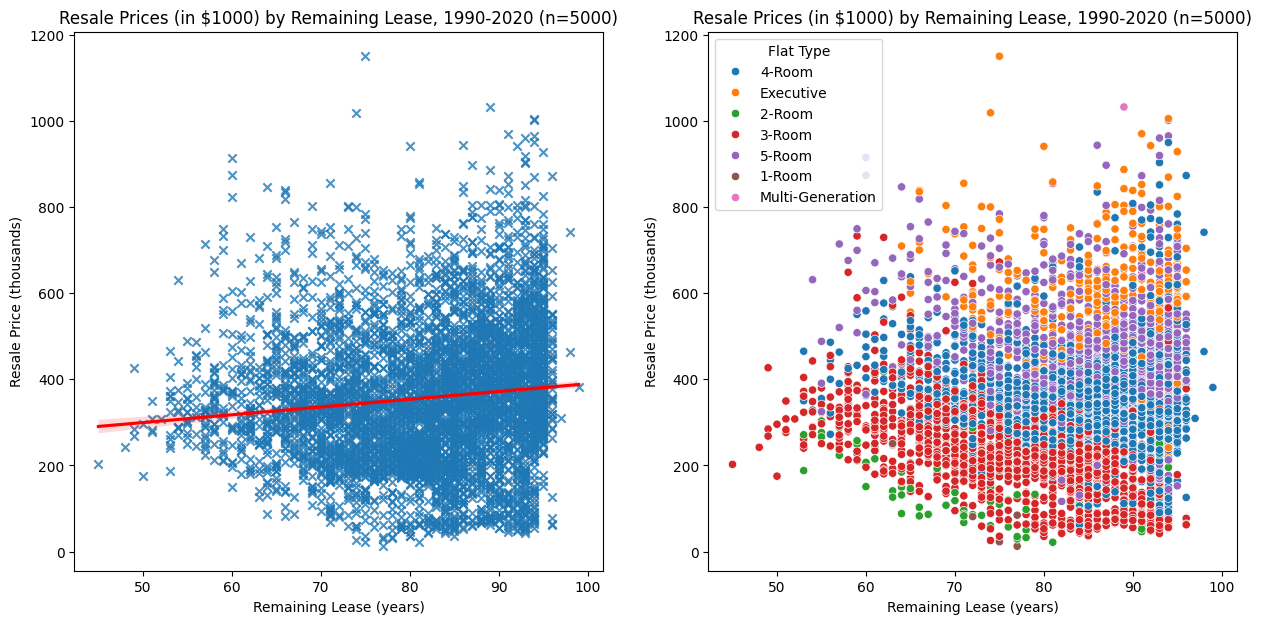

In [59]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.regplot(sample, x="remaining_lease", y="real_resale_price",
            marker="x", fit_reg=True, line_kws=dict(color="r"))
plt.title("Resale Prices (in $1000) by Remaining Lease, 1990-2020 (n=5000)")
plt.xlabel("Remaining Lease (years)")
plt.ylabel("Resale Price (thousands)")

plt.subplot(1, 2, 2)
sns.scatterplot(sample, x="remaining_lease", y="real_resale_price", hue="flat_type")
plt.title("Resale Prices (in $1000) by Remaining Lease, 1990-2020 (n=5000)")
plt.xlabel("Remaining Lease (years)")
plt.ylabel("Resale Price (thousands)")
plt.legend(title="Flat Type")

In [60]:
r = flats_df["remaining_lease"].corr(flats_df["real_resale_price"])
print(f"Pearson's Correlation Coefficient: r = {r}")

Pearson's Correlation Coefficient: r = 0.12454512046649631


From the graph above, there appears to be a rather <b>weak positive relationship between remaining lease and resale prices</b>. More notably, the range of resale prices increases drastically as the remaining lease increases, as the 3- and 4-Room flats occupy the lower end, while the 5-Room and Executive flats occupy the higher end. Let's take a closer look at the breakdown by flat type.

In [61]:
def get_r(test):
    flat_types = sorted(list(test.flat_type.unique()))
    corr_coeffs = []

    for type in flat_types:
        df = test.loc[test.flat_type == type]
        corr_coeffs.append(df["remaining_lease"].corr(df["real_resale_price"]))

    new_df = pd.DataFrame(zip(flat_types, corr_coeffs), columns=["flat_type", "r"])

    return new_df

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1-Room'),
  Text(1, 0, '2-Room'),
  Text(2, 0, '3-Room'),
  Text(3, 0, '4-Room'),
  Text(4, 0, '5-Room'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Multi-Generation')])

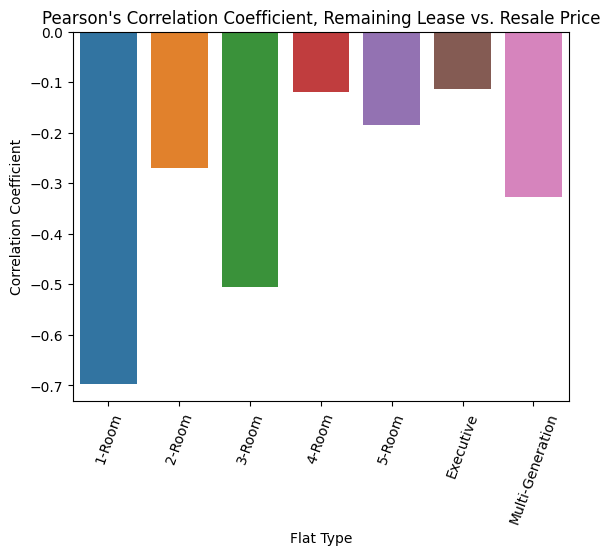

In [62]:
sns.barplot(get_r(flats_df), x="flat_type", y="r", hue="flat_type")
plt.title("Pearson's Correlation Coefficient, Remaining Lease vs. Resale Price")
plt.xlabel("Flat Type")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=70)

Although resale prices increased with the remaining lease <i>overall</i>, if we break it down by flat type, we see that the r-value is negative for all flat types, indicating that <b>within each category, the newer the flat, the lower the resale price</b>, which does not make sense at first glance, since the value of the flats should depreciate as they age.<br><br>
Instead, let's focus on a particular year of transaction, say 2020.

In [63]:
mask = flats_df.transaction_year == 2020
flats_2020 = flats_df[mask]

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1-Room'),
  Text(1, 0, '2-Room'),
  Text(2, 0, '3-Room'),
  Text(3, 0, '4-Room'),
  Text(4, 0, '5-Room'),
  Text(5, 0, 'Executive'),
  Text(6, 0, 'Multi-Generation')])

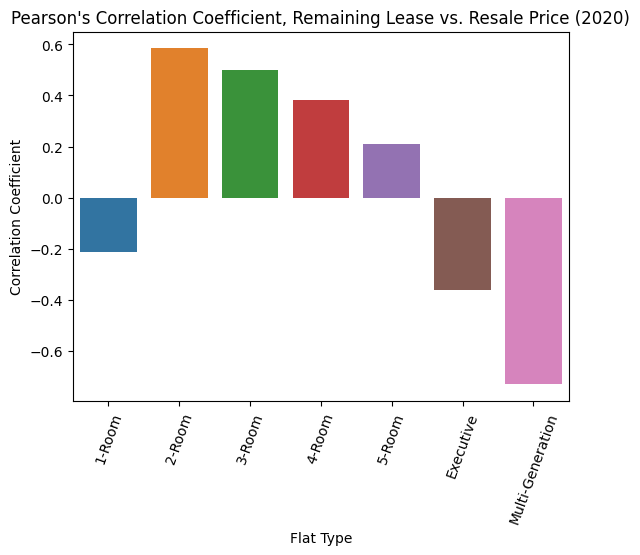

In [64]:
sns.barplot(get_r(flats_2020), x="flat_type", y="r", hue="flat_type")
plt.title("Pearson's Correlation Coefficient, Remaining Lease vs. Resale Price (2020)")
plt.xlabel("Flat Type")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=70)

We see that price is positively correlated with remaining lease when analysed by year. This makes sense because the resale price depends on the year of transaction, but grouping by flat type is an arbitrary choice which has <i>no temporal relation</i> to a flat's value. Hence, grouping the data by flat type aggregates the data by transaction year, which encompasses the whole range of resale prices over the 3 decades, producing the inverted relationship seen in the previous figures.<br><br>
Now, we can conclude that <b>in any particular year, the resale price generally goes up with the length of the remaining lease</b>.

<h4><b>4. Summary of Conclusions

From this project, we have derived the following observations/conclusions:
1) With inflation accounted for, resale prices have risen by around 300% since the 1990s.
2) A prolonged stunting of the property market could be attributed to the 1997 Asian Financial Crisis, which took around 8-9 years to recover.
3) Resale prices are highest in regions like Bukit Timah, Bishan and Pasir Ris, and lowest in Yishun, Geylang and Ang Mo Kio.
4) The maturity of the town has no strong correlation with resale prices.
5) Resale prices increase with floor area, and their corresponding flat types.
6) Flats at higher storeys fetch higher resale prices.
7) In each year, resale price generally increases with the duration of  the remaining lease.

<h4><b>5. References

Below are the list of references used:
- [1] https://www.channelnewsasia.com/singapore/property-cooling-measures-hdb-resale-prices-2013-2018-each-singapore-town-2385831<br>
- [2] https://www.rateinflation.com/consumer-price-index/singapore-historical-cpi/<br>
- [3] https://www.hdb.gov.sg/-/media/doc/CCG/20082023-Annexes/Annex-A1.ashx<br>
- [4] https://www.teoalida.com/singapore/hdbflattypes/